In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#读取数据
data=pd.read_csv('cym_data_pca.csv')
# print(data)

In [3]:
#配置参数
k=4#降到k维

In [4]:
#原始pca
pca = PCA(n_components=k)   #降到k维
pca.fit(data)
yuanshiObj={
    'newData':pca.fit_transform(data),   #降维后的数据
    'evr':pca.explained_variance_ratio_, #输出贡献率
    'cp':pca.components_,                #具有最大方差的成分
}
print(yuanshiObj)

{'newData': array([[1160.1425737 , -293.91754364,   48.57839763,   -8.71197531],
       [1269.12244319,   15.63018184,  -35.39453423,   17.86128323],
       [ 995.79388896,   39.15674324,   -1.70975298,    4.1993401 ],
       ...,
       [ 314.50175618,   47.55352518,  -10.44240718,   -9.77188104],
       [1124.85811531,   34.12922497,  -19.74208742,  -23.66088144],
       [-771.52762188,  -88.64310636,   23.88903189,    2.54724855]]), 'evr': array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04]), 'cp': array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
  

In [5]:
# 权重pca
def norm_(x):
    xmean = np.mean(x,0)
    std = np.std(x,0)
    var =np.var(x,0)
    w=var/var.sum()
    return ((x-xmean)*w)/std
data_ = norm_(data)

# ew, ev = np.linalg.eig(data_.T.dot(data_))
ew, ev = np.linalg.eig(np.cov(data_.T))
ew_order = np.argsort(ew)[::-1]
ew_sort = ew[ew_order]
ev_sort = ev[:,ew_order]
# pd.DataFrame(ew_sort).plot(kind='bar')
# pd.DataFrame(ew_sort/ew_sort.sum()).plot(kind='bar')
V = ev_sort[:,:k]
wpcaObj={
    'newData':data_.dot(V),   #降维后的数据
    'evr':ew_sort/ew_sort.sum(), #输出贡献率
    'cp':V,                #具有最大方差的成分
}
print(wpcaObj)

{'newData':             0         1         2         3
0    1.439988 -0.245462 -0.004998  0.001924
1    1.453398  0.019649  0.003670 -0.001152
2    1.128027  0.037908  0.000185 -0.000284
3   -0.442755 -0.059466 -0.000952  0.000973
4    0.995004  0.165292 -0.000105 -0.000093
..        ...       ...       ...       ...
564  1.578810  0.100420 -0.003978 -0.000602
565  1.169743  0.070670 -0.000020 -0.000312
566  0.342860  0.041952  0.000992  0.000247
567  1.277257  0.034186  0.001818  0.001517
568 -0.851980 -0.078422 -0.002320 -0.000738

[569 rows x 4 columns], 'evr': array([9.91026109e-01, 8.96145591e-03, 1.19994967e-05, 4.08105820e-07,
       1.59101011e-08, 1.14312003e-08, 3.36065761e-10, 2.78740250e-11,
       9.31139639e-12, 1.65931682e-12, 2.74653040e-13, 4.80837615e-15,
       8.60317089e-16, 6.14002501e-16, 6.68839945e-17, 2.01325641e-17,
       1.14117503e-17, 2.54936648e-18, 1.98934380e-18, 1.20126805e-18,
       7.27795989e-19, 3.12647108e-19, 1.50701507e-19, 9.21903932e-20,
  

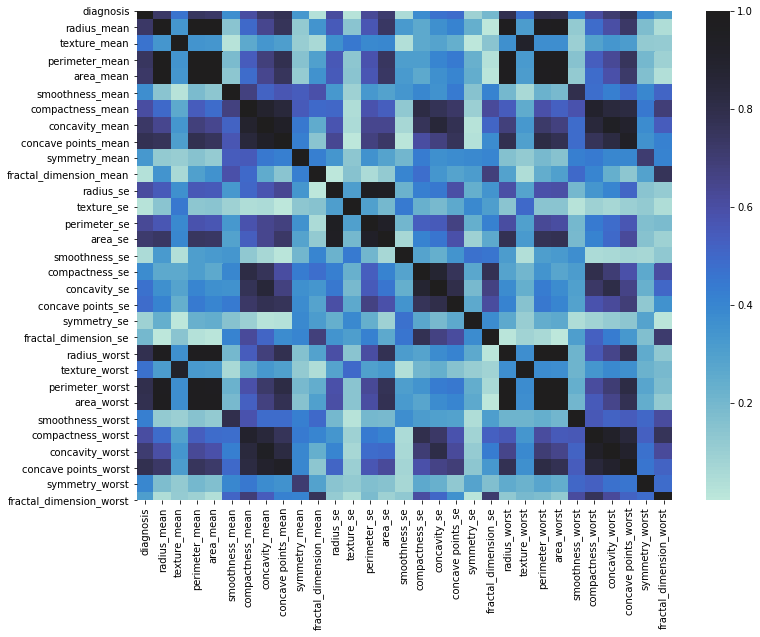

diagnosis                  1.000000
radius_mean                0.732785
texture_mean               0.461971
perimeter_mean             0.748496
area_mean                  0.734122
smoothness_mean            0.371892
compactness_mean           0.609288
concavity_mean             0.733308
concave points_mean        0.777877
symmetry_mean              0.332567
fractal_dimension_mean    -0.025903
radius_se                  0.616912
texture_se                 0.019419
perimeter_se               0.630411
area_se                    0.714184
smoothness_se             -0.052193
compactness_se             0.380666
concavity_se               0.470338
concave points_se          0.488717
symmetry_se               -0.092303
fractal_dimension_se       0.201492
radius_worst               0.787933
texture_worst              0.476720
perimeter_worst            0.796319
area_worst                 0.786902
smoothness_worst           0.425513
compactness_worst          0.606810
concavity_worst            0

In [40]:
#互信息
data_train=pd.read_csv('cym_data_pca_diagnosis.csv')
# 类别型变量
class_variable = [
    col for col in data_train.columns if data_train[col].dtypes == 'O']
# 数值型变量
numerical_variable = [
    col for col in data_train.columns if data_train[col].dtypes != 'O']  # 大写o
# print('类别型变量:%s' % class_variable, '数值型变量:%s' % numerical_variable)

# 绘制热力图，查看一下数值型变量之间的关系
corrmat = data_train[numerical_variable].corr('spearman')
f, ax = plt.subplots(figsize=(12, 9))
ax.set_xticklabels(corrmat, rotation='horizontal')
sns.heatmap(np.fabs(corrmat), square=False, center=1)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=90)
plt.show()

# 计算变量之间的相关性
numerical_variable_corr = data_train[numerical_variable].corr('spearman')
print(numerical_variable_corr['diagnosis'])
numerical_corr = numerical_variable_corr[
    numerical_variable_corr['diagnosis'] >= 0]['diagnosis']
# print(numerical_corr.sort_values(ascending=False))
print(numerical_corr.shape)
index0 = numerical_corr.sort_values(ascending=False).index

# 结合考虑两两变量之间的相关性
print(data_train[index0].corr('spearman'))

# 结合上述情况，选择出相关性大于阈值的变量，在这个基础上再考虑变量之间的多重共线性
print(numerical_variable)
new_numerical=numerical_variable.copy()

# new_numerical.remove('texture_se')

new_numerical = ['perimeter_worst', 'radius_worst', 'area_worst','concave points_worst', 'concave points_mean', 
                 'perimeter_mean', 'area_mean', 'radius_mean','concavity_mean','area_se',
                 'concavity_worst','perimeter_se','compactness_mean','radius_se','compactness_worst',
                 'texture_worst']

print(new_numerical)

X = np.matrix(data_train[new_numerical])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

pca_h = PCA(n_components=k)   #降到k维
pca_h.fit(X)
hpcaObj={
    'newData':pca_h.fit_transform(X),   #降维后的数据
    'evr':pca_h.explained_variance_ratio_, #输出贡献率
    'cp':pca_h.components_,                #具有最大方差的成分
}
print(hpcaObj)

In [39]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def NMI_matrix(df):  # 计算标准化互信息矩阵
    number = df.columns.size  # 获取df的列数
    List = []
    Name = []
    for n in range(number):
        Name.append(df.columns[n])  # 获取dataframe的索引
    for i in range(number):
        A = []
        X = df[df.columns[i]]  # df.columns[i]获取对应列的索引，df['索引']获取对应列的数值
        for j in range(number):
            Y = df[df.columns[j]]
            A.append(metrics.normalized_mutual_info_score(X, Y))  # 计算标准化互信息
        List.append(A)  # List是列表格式
    print('NMI(标准化互信息) = \n', pd.DataFrame(List, index=Name, columns=Name))  # 将二维列表转为dataframe格式
#     figure, ax = plt.subplots(figsize=(12, 12))
#     sns.heatmap(pd.DataFrame(List, index=Name, columns=Name), square=True, annot=True, ax=ax)  # 画出热力图
#     plt.show()


if __name__ == '__main__':
    NMI_matrix(data_train)  # df是dataframe格式,计算df的标准化互信息矩阵

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

NMI(标准化互信息) = 
                          diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.298434      0.288244        0.316785   
radius_mean               0.298434     1.000000      0.957434        0.966880   
texture_mean              0.288244     0.957434      1.000000        0.972102   
perimeter_mean            0.316785     0.966880      0.972102        1.000000   
area_mean                 0.316142     0.971747      0.975728        0.984699   
smoothness_mean           0.268377     0.954820      0.960222        0.969595   
compactness_mean          0.309846     0.970069      0.975244        0.984227   
concavity_mean            0.319410     0.967649      0.972860        0.981904   
concave points_mean       0.321498     0.968686      0.973881        0.982900   
symmetry_mean             0.256444     0.945425      0.950968        0.960586   
fractal_dimension_mean    0.287177     0.961934      0.967230        0.976420   
radius_se   

H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureW

In [7]:
#对比
print('原始pca',yuanshiObj)
print('权重pca',wpcaObj)
print('互信息pca',hpcaObj)

原始pca {'newData': array([[1160.1425737 , -293.91754364,   48.57839763,   -8.71197531],
       [1269.12244319,   15.63018184,  -35.39453423,   17.86128323],
       [ 995.79388896,   39.15674324,   -1.70975298,    4.1993401 ],
       ...,
       [ 314.50175618,   47.55352518,  -10.44240718,   -9.77188104],
       [1124.85811531,   34.12922497,  -19.74208742,  -23.66088144],
       [-771.52762188,  -88.64310636,   23.88903189,    2.54724855]]), 'evr': array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04]), 'cp': array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-

In [8]:
#熵权法
import pandas as pd
import numpy as np
import math
from numpy import array
 
# 1读取数据
df=pd.read_csv('cym_data_pca.csv')
# 2数据预处理 ,去除空值的记录
df.dropna()
 
#定义熵值法函数
def cal_weight(x):
    '''熵值法计算变量的权重'''
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
    '''
    如果数据实际不为零，则赋予最小值
    if x==0:
        x=0.00001
    else:
        pass
    '''
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
 
    lnf = [[None] * cols for i in range(rows)]
 
    # 矩阵计算--
    # 信息熵

    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
 
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    
    w = pd.DataFrame(w)
    return w

if __name__ == '__main__':
    # 计算df各字段的权重
    w = cal_weight(df)  # 调用cal_weight
    w.index = df.columns
    w.columns = ['weight']
    print(w)            #输出权重
    print('熵权法计算权重运行完成!')
    print(w.sum())


                           weight
radius_mean              0.019290
texture_mean             0.016822
perimeter_mean           0.020043
area_mean                0.033980
smoothness_mean          0.008673
compactness_mean         0.029759
concavity_mean           0.060931
concave points_mean      0.048927
symmetry_mean            0.010917
fractal_dimension_mean   0.023507
radius_se                0.055280
texture_se               0.031338
perimeter_se             0.054643
area_se                  0.086756
smoothness_se            0.022079
compactness_se           0.041333
concavity_se             0.051156
concave points_se        0.021968
symmetry_se              0.029213
fractal_dimension_se     0.048067
radius_worst             0.025845
texture_worst            0.017159
perimeter_worst          0.026809
area_worst               0.045787
smoothness_worst         0.011813
compactness_worst        0.035943
concavity_worst          0.047523
concave points_worst     0.028713
symmetry_worst